In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r"E:\NTI -Summer Training\Final Project\heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [10]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority' , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [13]:
X_train , X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.15, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 12), (61, 12), (345,), (61,))

In [15]:
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200] },
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200]}
}

ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")


Random Forest: Best Parameters - {'n_estimators': 50}, Best Score - 0.8956521739130434
Bagging: Best Parameters - {'n_estimators': 10}, Best Score - 0.8695652173913043
AdaBoost: Best Parameters - {'n_estimators': 100}, Best Score - 0.8724637681159422
Gradient Boosting: Best Parameters - {'n_estimators': 100}, Best Score - 0.8927536231884059
XGBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.8898550724637682


In [16]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")  
    print(classification_report(y_test, y_pred))  


Random Forest Results:
Accuracy: 0.8689
F1 Score: 0.8684
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.88        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Bagging Results:
Accuracy: 0.7213
F1 Score: 0.7209
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.70      0.77      0.73        30

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61


AdaBoost Results:
Accuracy: 0.8197
F1 Score: 0.8187
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy       

In [17]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.85      0.93      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



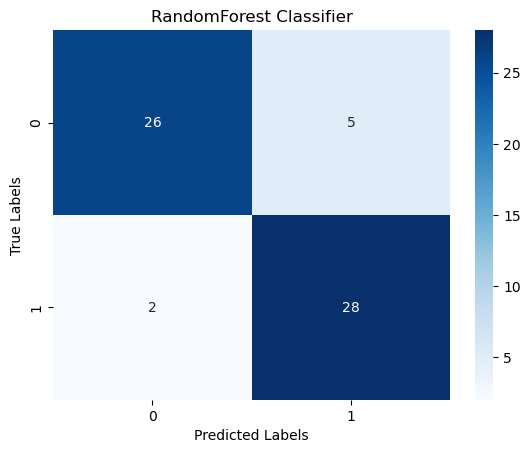

In [18]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
model_B = BaggingClassifier(n_estimators=20)
model_B.fit(X_train, y_train)
y_pred_B = model_B.predict(X_test)
print(classification_report(y_test, y_pred_B))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



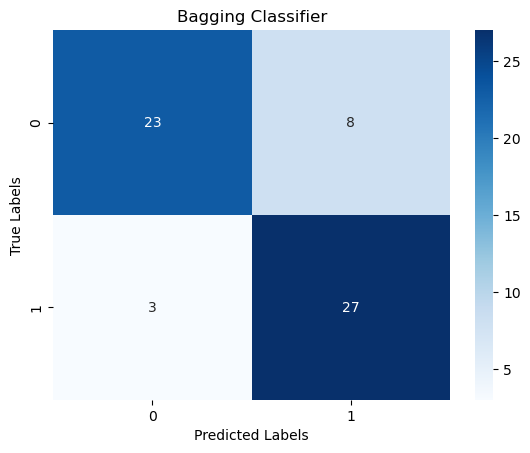

In [20]:
cm = confusion_matrix(y_test, y_pred_B)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
model_AB = AdaBoostClassifier(n_estimators=200)
model_AB.fit(X_train, y_train)
y_pred_AB = model_AB.predict(X_test)
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



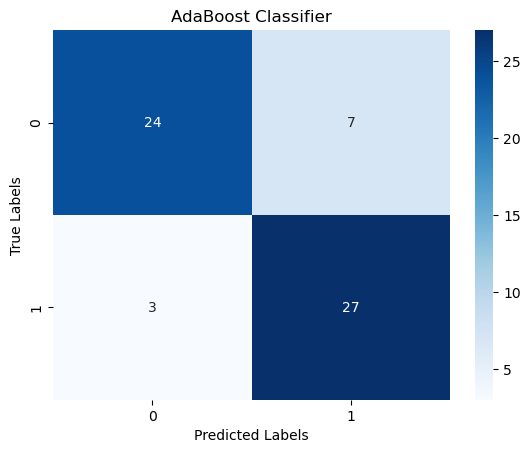

In [22]:
cm = confusion_matrix(y_test, y_pred_AB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
model_GB = GradientBoostingClassifier(n_estimators=100)
model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.79      0.87      0.83        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



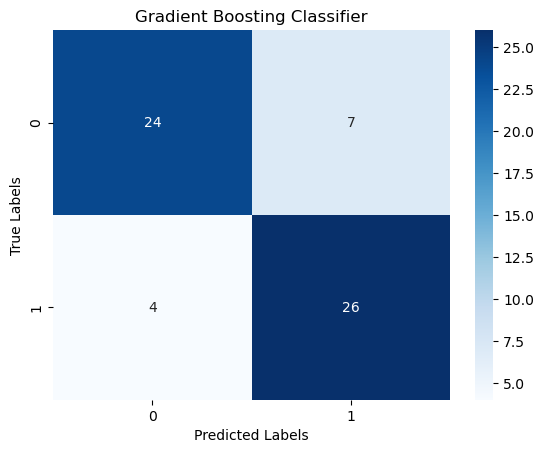

In [24]:
cm = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
model_XGB = XGBClassifier(n_estimators=200)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



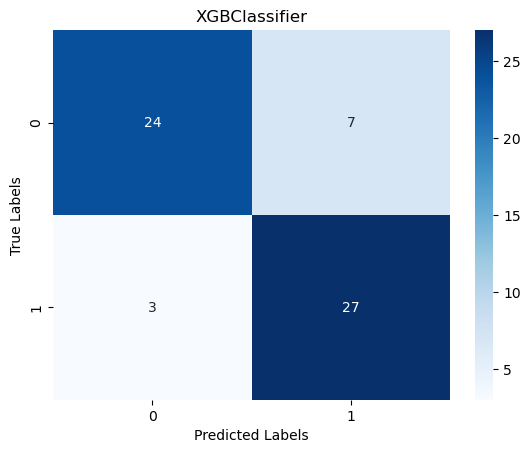

In [26]:
cm = confusion_matrix(y_test, y_pred_XGB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [27]:
import joblib

joblib.dump(model_RF , 'RandomForest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
model = joblib.load('RandomForest_model.pkl')
scaler = joblib.load('scaler.pkl')